# DATA SCIENCE CAPSTONE PROJECT WEEK 5.

#### Data_Source:

In [1]:
import pandas as pd
import requests

# Get the dataset metadata by passing package_id to the package_search endpoint
# For example, to retrieve the metadata for this dataset:

url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show"
params = { "id": "71e6c206-96e1-48f1-8f6f-0e804687e3be"}
package = requests.get(url, params = params).json()
print(package["result"])

# Get the data by passing the resource_id to the datastore_search endpoint
# See https://docs.ckan.org/en/latest/maintaining/datastore.html for detailed parameters options
# For example, to retrieve the data content for the first resource in the datastore:

for idx, resource in enumerate(package["result"]["resources"]):
    if resource["datastore_active"]:
        url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/datastore_search"
        p = { "id": resource["id"] }
        data = requests.get(url, params = p).json()
        df = pd.DataFrame(data["result"]["records"])
        break
df

{'license_title': 'Open Government Licence – Toronto', 'owner_unit': None, 'relationships_as_object': [], 'topics': 'Transportation,Health', 'owner_email': 'Sandro.Tersigni@toronto.ca', 'excerpt': "Bike Parking location and asset type data maintained by the City of Toronto's Bike Parking Program.\r\n", 'private': False, 'owner_division': 'Transportation Services', 'num_tags': 6, 'id': '71e6c206-96e1-48f1-8f6f-0e804687e3be', 'metadata_created': '2019-07-23T18:01:58.028981', 'refresh_rate': 'Daily', 'title': 'Street Furniture - Bicycle Parking', 'license_url': 'https://open.toronto.ca/open-data-license/', 'state': 'active', 'information_url': 'http://gis.toronto.ca/arcgis/rest/services/primary/cot_geospatial2_mtm/MapServer/27', 'license_id': 'open-government-licence-toronto', 'type': 'dataset', 'resources': [{'cache_last_updated': None, 'package_id': '71e6c206-96e1-48f1-8f6f-0e804687e3be', 'datastore_active': True, 'id': 'e0700d94-0c4d-4058-9354-a4b397c0b249', 'size': None, 'format': 'Ge

,_id,OBJECTID,ID,ADDRESSNUMBERTEXT,ADDRESSSTREET,FRONTINGSTREET,SIDE,FROMSTREET,DIRECTION,SITEID,WARD,BIA,ASSETTYPE,STATUS,SDE_STATE_ID,X,Y,LONGITUDE,LATITUDE,geometry
0,5483526,33,BP-03501,8,Kensington Ave,None,None,Kensington Ave,None,None,11,Kensington Market,Ring,Existing,0,312856.125,4834795.334,-79.400127,43.653058,"{""type"": ""Point"", ""coordinates"": [-79.40012740..."
1,5483527,43,BP-12883,21,Canniff St,None,None,Strachan Ave,None,None,10,None,Ring,Existing,0,311940.672,4833504.872,-79.411493,43.641451,"{""type"": ""Point"", ""coordinates"": [-79.41149341..."
2,5483528,105,BP-11699,70,The Pond Rd,None,None,Seneca Lane,None,None,07,None,Rack,Existing,0,304813.343,4847867.805,-79.499834,43.770770,"{""type"": ""Point"", ""coordinates"": [-79.49983426..."
3,5483529,110,BP-11900,8,Assiniboine Rd,None,None,Nelson Rd,None,None,07,None,Rack,Existing,0,304460.910,4847578.496,-79.504212,43.768166,"{""type"": ""Point"", ""coordinates"": [-79.50421178..."
4,5483530,171,BP-14805,359,King St E,None,None,Derby St,None,None,13,St. Lawrence Market Neighbourhood,Ring,Temporarily Removed,0,315707.043,4834678.549,-79.364787,43.651970,"{""type"": ""Point"", ""coordinates"": [-79.36478673..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5483621,1413,BP-19427,181,Bedford Rd,Davenport Rd,North,Bedford Rd,East,None,11,None,Ring,Temporarily Removed,0,312911.456,4837171.793,-79.399406,43.674448,"{""type"": ""Point"", ""coordinates"": [-79.39940575..."
96,5483622,1414,BP-19429,181,Bedford Rd,Davenport Rd,North,Bedford Rd,East,None,11,None,Ring,Temporarily Removed,0,312914.708,4837171.675,-79.399365,43.674447,"{""type"": ""Point"", ""coordinates"": [-79.39936542..."
97,5483623,1415,BP-19430,354,Davenport Rd,Davenport Rd,East,Dupont St,South,None,11,None,Ring,Existing,0,312737.073,4837263.017,-79.401567,43.675271,"{""type"": ""Point"", ""coordinates"": [-79.40156701..."
98,5483624,1416,BP-19451,None,None,Walton St,North,Yonge St,West,None,11,Downtown Yonge,Ring,Existing,0,314309.950,4835423.606,-79.382093,43.658696,"{""type"": ""Point"", ""coordinates"": [-79.38209316..."


## Processing and Cleaning of Data 

In [2]:
df.head()

,_id,OBJECTID,ID,ADDRESSNUMBERTEXT,ADDRESSSTREET,FRONTINGSTREET,SIDE,FROMSTREET,DIRECTION,SITEID,WARD,BIA,ASSETTYPE,STATUS,SDE_STATE_ID,X,Y,LONGITUDE,LATITUDE,geometry
0,5483526,33,BP-03501,8,Kensington Ave,None,None,Kensington Ave,None,None,11,Kensington Market,Ring,Existing,0,312856.125,4834795.334,-79.400127,43.653058,"{""type"": ""Point"", ""coordinates"": [-79.40012740..."
1,5483527,43,BP-12883,21,Canniff St,None,None,Strachan Ave,None,None,10,None,Ring,Existing,0,311940.672,4833504.872,-79.411493,43.641451,"{""type"": ""Point"", ""coordinates"": [-79.41149341..."
2,5483528,105,BP-11699,70,The Pond Rd,None,None,Seneca Lane,None,None,07,None,Rack,Existing,0,304813.343,4847867.805,-79.499834,43.770770,"{""type"": ""Point"", ""coordinates"": [-79.49983426..."
3,5483529,110,BP-11900,8,Assiniboine Rd,None,None,Nelson Rd,None,None,07,None,Rack,Existing,0,304460.910,4847578.496,-79.504212,43.768166,"{""type"": ""Point"", ""coordinates"": [-79.50421178..."
4,5483530,171,BP-14805,359,King St E,None,None,Derby St,None,None,13,St. Lawrence Market Neighbourhood,Ring,Temporarily Removed,0,315707.043,4834678.549,-79.364787,43.651970,"{""type"": ""Point"", ""coordinates"": [-79.36478673..."


In [3]:
df_1 = df[['_id','X','Y','ADDRESSSTREET','LONGITUDE','LATITUDE']]
print(df_1)

        _id           X            Y   ADDRESSSTREET  LONGITUDE   LATITUDE
0   5483526  312856.125  4834795.334  Kensington Ave -79.400127  43.653058
1   5483527  311940.672  4833504.872      Canniff St -79.411493  43.641451
2   5483528  304813.343  4847867.805     The Pond Rd -79.499834  43.770770
3   5483529  304460.910  4847578.496  Assiniboine Rd -79.504212  43.768166
4   5483530  315707.043  4834678.549       King St E -79.364787  43.651970
..      ...         ...          ...             ...        ...        ...
95  5483621  312911.456  4837171.793      Bedford Rd -79.399406  43.674448
96  5483622  312914.708  4837171.675      Bedford Rd -79.399365  43.674447
97  5483623  312737.073  4837263.017    Davenport Rd -79.401567  43.675271
98  5483624  314309.950  4835423.606            None -79.382093  43.658696
99  5483625  314293.442  4835418.785            None -79.382298  43.658653

[100 rows x 6 columns]


In [4]:
df_1.describe()

,_id,X,Y,LONGITUDE,LATITUDE
count,1.000000e+02,100.000000,1.000000e+02,100.000000,100.000000
mean,5.483576e+06,312416.847310,4.836128e+06,-79.405559,43.665050
std,2.901149e+01,2708.654029,3.108190e+03,0.033584,0.027982
min,5.483526e+06,304032.946000,4.831217e+06,-79.509508,43.620890
25%,5.483551e+06,311115.279250,4.834338e+06,-79.421696,43.648927
50%,5.483576e+06,312969.151000,4.835040e+06,-79.398634,43.655258
75%,5.483600e+06,313807.997000,4.836775e+06,-79.388323,43.670888
max,5.483625e+06,317989.597000,4.847868e+06,-79.336464,43.770770


In [5]:
df_1.iloc[:10]

,_id,X,Y,ADDRESSSTREET,LONGITUDE,LATITUDE
0,5483526,312856.125,4834795.334,Kensington Ave,-79.400127,43.653058
1,5483527,311940.672,4833504.872,Canniff St,-79.411493,43.641451
2,5483528,304813.343,4847867.805,The Pond Rd,-79.499834,43.770770
3,5483529,304460.910,4847578.496,Assiniboine Rd,-79.504212,43.768166
4,5483530,315707.043,4834678.549,King St E,-79.364787,43.651970
5,5483531,313239.951,4836900.226,Avenue Rd,-79.395336,43.672000
6,5483532,312876.928,4834998.675,Baldwin St,-79.399866,43.654888
7,5483533,313503.184,4833936.254,Blue Jays Way,-79.392120,43.645318
8,5483534,309323.837,4835314.509,Bloor St W,-79.443913,43.657761
9,5483535,313505.863,4835081.661,Mc Caul St,-79.392068,43.655628


In [6]:
df_2 =df_1[['X','Y']]
#df_2 = dataframe(Data,columns=['x','y'])
print(df_2)

             X            Y
0   312856.125  4834795.334
1   311940.672  4833504.872
2   304813.343  4847867.805
3   304460.910  4847578.496
4   315707.043  4834678.549
..         ...          ...
95  312911.456  4837171.793
96  312914.708  4837171.675
97  312737.073  4837263.017
98  314309.950  4835423.606
99  314293.442  4835418.785

[100 rows x 2 columns]


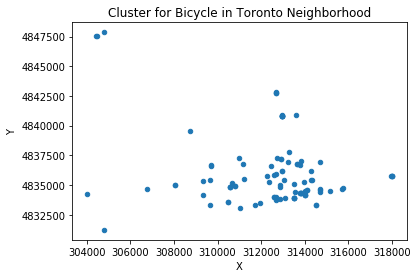

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_2 = pd.DataFrame(data, columns=['x', 'y'])
df.plot.scatter(x='X',y='Y',title = 'Cluster for Bicycle in Toronto Neighborhood')

In [8]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\george\anaconda\lib\site-packages (0.23.1)


## Installation of Folium to aid Map Interpretation.

In [9]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')
from sklearn.cluster import KMeans
import folium
print('Folium installed and imported!')

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0
  - anaconda/win-64::ca-certificates-2020.1.1-0, defaults/win-64::openssl-1.1.1d-he774522_4
  - defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::openssl-1.1.1d-he774522_4done

## Package Plan ##

  environment location: C:\Users\GEORGE\Anaconda

  added / updated specs:
    - folium=0.5.0


The following packages will be DOWNGRADED:

  folium                                        0.11.0-py_0 --> 0.5.0-py_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Folium installed and imported!
Folium installed and imported!


In [10]:
latitude = 43.653058
longitude = -79.400127

In [11]:
# define the world map
Toronto_map = folium.Map(location = [latitude,longitude], zoom_start =15)

# display world map
Toronto_map

In [12]:
# importing old libraries (also used in the two first parts)
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from bs4 import BeautifulSoup as bs

In [13]:
# importing new libraries
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Generating maps from processed data.

In [14]:
# geocode address and place marker on map

# map
Toronto_map = folium.Map(location=[43.653058, -79.400127], zoom_start=12)

# get location information for address
#address = geocoder.osm('Kensington Ave')

# address latitude and longitude
address_latlng = [43.65305, -79.400127]

# add marker to map
folium.Marker(location=[43.65305, -79.400127], popup='Kensington Ave').add_to(Toronto_map)

# display map
Toronto_map

In [20]:
# multiple markers using dataframe
# there is an example below using apply function instead of loop

# create map
Toronto_map = folium.Map(location=[43.653058, -79.400127], zoom_start=12)

# plot airport locations
for (index, row) in df.iterrows():
    folium.Marker(location=[row.loc['LATITUDE'], row.loc['LONGITUDE']], 
                  popup=row.loc['ADDRESSSTREET']).add_to(Toronto_map)

    Toronto_map.save('Toronto_map.html')    
# display map    
Toronto_map

### Saving Map for Display.

In [18]:
Toronto_map = folium.Map(location=[43.653058, -79.400127], zoom_start=12)
# put in path.html
#Toronto_map.save('index.html')
#Toronto_map.save(/Users/GEORGE/Desktop/Toronto_map.html)

In [17]:
# Below are the List of locations dedicated to Bicycle route with the Toronto
df_3 = df[['ADDRESSSTREET','LONGITUDE','LATITUDE']]
print(df_3)

         ADDRESSSTREET  LONGITUDE   LATITUDE
0       Kensington Ave -79.400127  43.653058
1           Canniff St -79.411493  43.641451
2          The Pond Rd -79.499834  43.770770
3       Assiniboine Rd -79.504212  43.768166
4            King St E -79.364787  43.651970
5            Avenue Rd -79.395336  43.672000
6           Baldwin St -79.399866  43.654888
7        Blue Jays Way -79.392120  43.645318
8           Bloor St W -79.443913  43.657761
9           Mc Caul St -79.392068  43.655628
10          Bloor St W -79.440076  43.658971
11        Davenport Rd -79.423442  43.675403
12          Lombard St -79.377324  43.651417
13            Yonge St -79.388269  43.672935
14  Western Battery Rd -79.414028  43.639938
15          Spadina Rd -79.404864  43.669486
16          Bloor St W -79.388866  43.669758
17   Mount Pleasant Rd -79.391024  43.708137
18         Bathurst St -79.402566  43.645471
19       Cottingham St -79.394941  43.680088
20         Victoria St -79.377482  43.652090
21        

### Here is my outcome and Thanks folks ....
### from : George Osagie Irumudomo.

### Contact: osaxx1@hotmail.com